<a href="https://colab.research.google.com/github/PhantomPheonix02/ICTAK-DSA_Assignments/blob/main/Aswini_Assmt_UnSupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
url = '/content/Wine_clust .csv'  # Replace 'path_to_your_file' with the actual path to your file
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

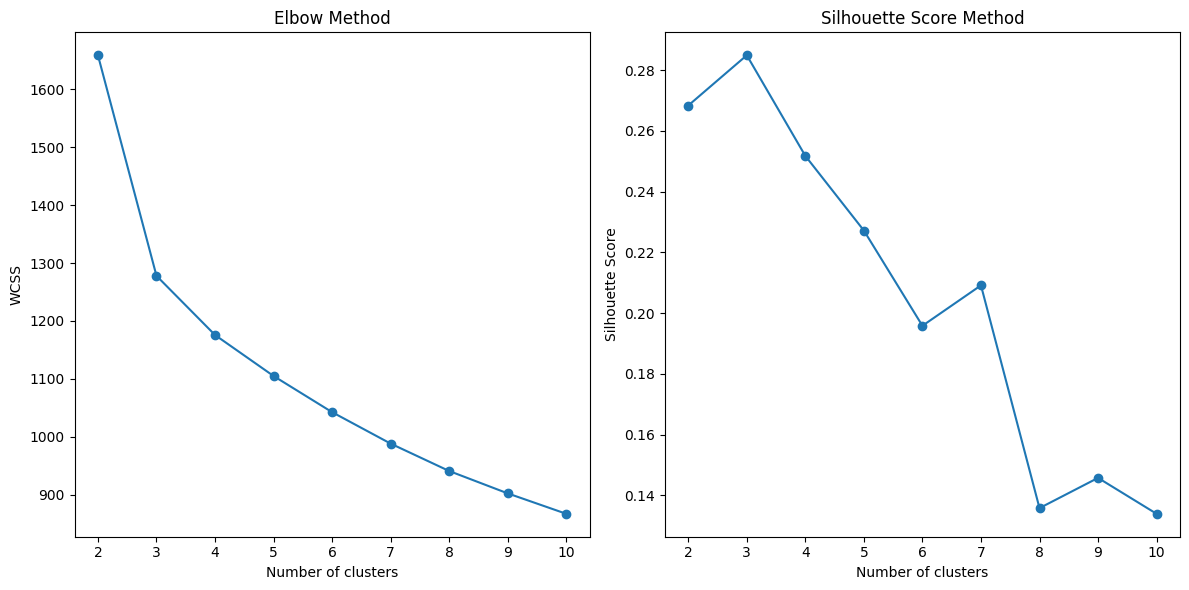

The optimal number of clusters is: 3
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Find the optimal number of clusters using the Elbow method
wcss = []
silhouette_scores = []
max_clusters = 10  # You can adjust this based on the dataset and requirements

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares

# Plot the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because we started from 2 clusters
print(f'The optimal number of clusters is: {optimal_clusters}')

# Train the K-means model with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_kmeans.fit(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = final_kmeans.labels_

# Display the first few rows of the dataset with cluster labels
print(data.head())


In [6]:
#hierarchial clustering

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Dataset Overview:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        1  
1   3.40     105

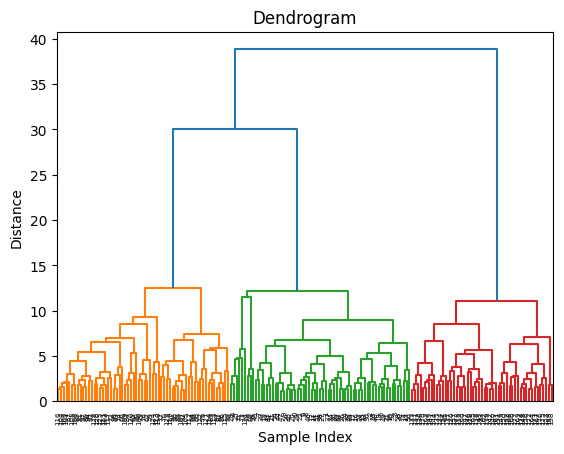

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster Distribution:
2    65
0    62
1    51
Name: Cluster, dtype: int64


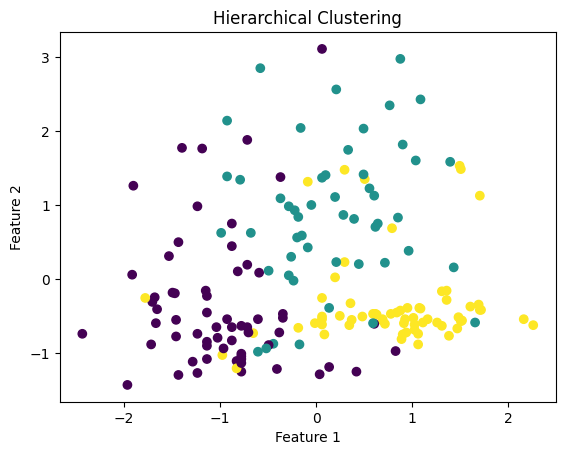

In [5]:

# Display the first few rows of the dataset to understand its structure
print("Dataset Overview:")
print(data.head())

# Check for missing values and handle them if necessary
print("\nMissing Values:")
print(data.isnull().sum())

# Standardize the data (optional, but often recommended for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the optimal number of clusters using dendrogram
linked = linkage(data_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, choose the optimal number of clusters
# Count the number of leaf nodes below a certain threshold distance
optimal_clusters = 3  # Adjust this based on your dendrogram analysis

# Perform hierarchical clustering with the optimal number of clusters
model = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display the count of samples in each cluster
print("\nCluster Distribution:")
print(data['Cluster'].value_counts())

# Save the clustered dataset if needed
# data.to_csv('clustered_wine_data.csv', index=False)

# Visualize the clusters (for 2D data, you may need to adapt for more dimensions)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.40     1050        2  
2   3

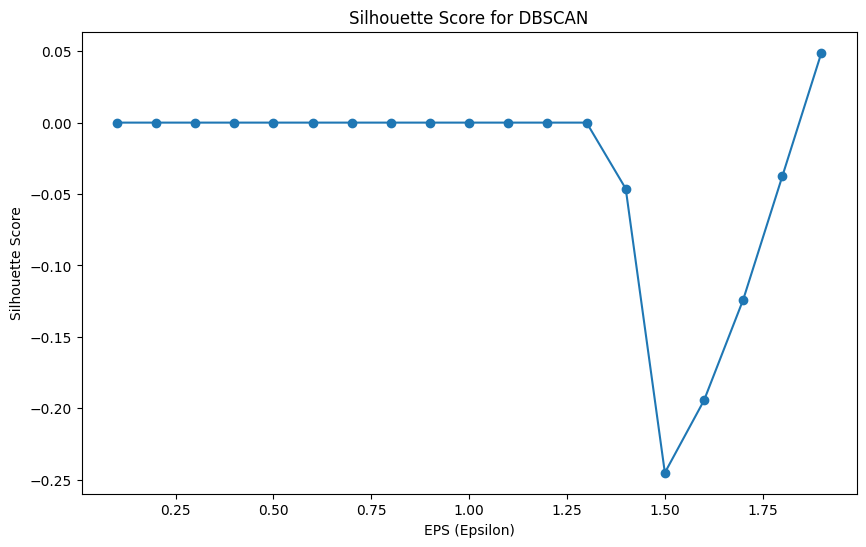

Optimal EPS value: 1.9000000000000001
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Extract features
features = data.iloc[:, 1:]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Find the optimum number of clusters using silhouette score
silhouette_scores = []
eps_values = np.arange(0.1, 2.0, 0.1)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan_labels = dbscan.fit_predict(features_scaled)

    # Check if there is more than one unique label
    if len(np.unique(dbscan_labels)) > 1:
        silhouette_scores.append(silhouette_score(features_scaled, dbscan_labels))
    else:
        silhouette_scores.append(0)  # Assign a default value if only one unique label

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('EPS (Epsilon)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the epsilon value with the highest silhouette score
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print(f'Optimal EPS value: {optimal_eps}')

# Create the DBSCAN model with the optimal number of clusters
dbscan_optimal = DBSCAN(eps=optimal_eps)
dbscan_labels_optimal = dbscan_optimal.fit_predict(features_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = dbscan_labels_optimal

# Display the first few rows of the dataset with cluster labels
print(data.head())
